# 1083 Albumin Analysis with Blood Diseases Cohort

### By: Ian Weimer

## Imports

In [95]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import scipy.stats
pd.set_option('display.max_columns', None)

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [96]:
pwd

'/Users/ianweimer/Desktop/JupyterNotebooks/1083-albumin-data-exploration/ML/Blood_Diseases_Cohort'

In [98]:
#/Users/ianweimer/Desktop/JupyterNotebooks/1083-albumin-data-exploration/ML/Tables/blood_diseases.csv

In [100]:
df_alb = pd.read_csv('/Users/ianweimer/Desktop/JupyterNotebooks/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/blood_diseases.csv', index_col=0)

In [101]:
df_alb.head()

personid                           encounterid  \
0  0007c498-2e93-4283-a3a7-1acdd95cfc00  0c4ca544-af0e-478d-ba31-79f2dc0df17b   
1  000c2d84-853e-480e-a287-4f7349ac831a  240d9022-1a49-4227-9321-f721cda9a352   
2  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
3  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
4  00a47dc5-f54c-4ff3-a85a-efd40f6327b6  e5804fa6-aacf-438a-94ce-baafd0aa2f4b   

  condition  albumin_24_hours   age sex   race  ICU    LOS_hours  zip_code  \
0       D62                 1  87.0   M  White    0    52.366667         1   
1       D64                 0  31.0   F  White    0    76.400000         3   
2       D62                 1  85.0   M  White    1   184.466667         7   
3       D64                 0  84.0   M    NaN    0   307.633333         1   
4       D64                 1  64.0   M  Other    0  1630.083333         9   

  bed_size  CCI  bl_albumin_value  last_albumin_value  \
0  500-999    4               NaN                 NaN   
1   >=1000    0               NaN                 NaN   
2  500-999    2               4.0                 3.6   
3   >=1000    6               1.6                 1.2   
4  300-499    8               NaN                 NaN   

   albumin_lab_baseline_severity  normal_albumin_achieved  qSOFA  \
0                            NaN                      NaN      0   
1                            NaN                      NaN      2   
2                            0.0                      NaN      1   
3                            1.0                      0.0      0   
4                            NaN                      NaN      0   

   hospital_free_days  beta_blocker  Cirrhosis_score  nutritional_anemia  \
0                 NaN             1                0                   0   
1                10.0             0                0                   0   
2                25.0             0                0                   0   
3                 NaN             1                0                   0   
4                 NaN             1                0                   0   

   MELD  SEWS  
0  11.0     0  
1   NaN     2  
2  10.0     3  
3   8.0     0  
4   8.0     1

In [102]:
df_alb.shape

(386135, 23)

In [103]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 302356
Number of unique encounters: 386135


In [104]:
df_alb.isnull().sum()

personid                              0
encounterid                           0
condition                             0
albumin_24_hours                      0
age                                  15
sex                                 959
race                              17819
ICU                                   0
LOS_hours                            35
zip_code                              0
bed_size                              0
CCI                                   0
bl_albumin_value                 205592
last_albumin_value               205592
albumin_lab_baseline_severity    205592
normal_albumin_achieved          267457
qSOFA                                 0
hospital_free_days               131467
beta_blocker                          0
Cirrhosis_score                       0
nutritional_anemia                    0
MELD                              86662
SEWS                                  0
dtype: int64

In [105]:
df = df_alb

In [107]:
df.hospital_free_days.describe()

count    254668.000000
mean         30.194049
std          28.694557
min           0.000000
25%           4.000000
50%          20.000000
75%          54.000000
max          90.000000
Name: hospital_free_days, dtype: float64

## Look at variables, null values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386135 entries, 0 to 386134
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   personid                       386135 non-null  object 
 1   encounterid                    386135 non-null  object 
 2   condition                      386135 non-null  object 
 3   albumin_24_hours               386135 non-null  int64  
 4   age                            386120 non-null  float64
 5   sex                            385176 non-null  object 
 6   race                           368316 non-null  object 
 7   ICU                            386135 non-null  int64  
 8   LOS_hours                      386100 non-null  float64
 9   zip_code                       386135 non-null  int64  
 10  bed_size                       386135 non-null  object 
 11  CCI                            386135 non-null  int64  
 12  bl_albumin_value              

In [15]:
df.isnull().sum()

# total_ICU_LOS_hours  set as 0
# days_until_readmission remove

# bl_albumin_value                  remove all
# last_albumin_value                
# albumin_lab_baseline_severity

# normal_albumin_achieved  \\ started out low, achieved normal albumin
# patients with low albumin initially
# remove

# time_to_albumin
# albumin_timing - 24 hrs albumin

# time_to_albumin -- remove variable completely

personid                              0
encounterid                           0
condition                             0
albumin_24_hours                      0
age                                  15
sex                                 959
race                              17819
ICU                                   0
LOS_hours                            35
zip_code                              0
bed_size                              0
CCI                                   0
bl_albumin_value                 205592
last_albumin_value               205592
albumin_lab_baseline_severity    205592
normal_albumin_achieved          267457
qSOFA                                 0
hospital_free_days               131467
beta_blocker                          0
Cirrhosis_score                       0
nutritional_anemia                    0
MELD                              86662
SEWS                                  0
dtype: int64

## Fill or Drop Rows with Null Values, Other

In [17]:
# drop time_to_albumin variable

# drop null time_to_albumin variable because it is problematic
# with no_albumin data

# df.drop(columns = ['time_to_albumin'], inplace=True)

In [19]:
# drop the following variables, as previous analysis determined they were 
# either collinear with other variables, or not useful for predictions

# age, sex, bed_size, last_albumin_value, hemoglobin

df.drop(columns = ['age', 'sex', 'bed_size', 'last_albumin_value'], inplace=True)

In [20]:
# change name of albumin_timing to albumin_24hrs var

df.rename(columns = {'albumin_24_hours':'albumin_24hrs'}, inplace=True)

## Remove albumin_lab_baseline_severity variable

In [21]:
df['albumin_lab_baseline_severity'].value_counts()

1.0    118678
0.0     61865
Name: albumin_lab_baseline_severity, dtype: int64

In [22]:
# it is all 1s provides no value

df.drop(columns = ['albumin_lab_baseline_severity'], inplace=True)

In [23]:
df.head()

personid                           encounterid  \
0  0007c498-2e93-4283-a3a7-1acdd95cfc00  0c4ca544-af0e-478d-ba31-79f2dc0df17b   
1  000c2d84-853e-480e-a287-4f7349ac831a  240d9022-1a49-4227-9321-f721cda9a352   
2  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
3  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
4  00a47dc5-f54c-4ff3-a85a-efd40f6327b6  e5804fa6-aacf-438a-94ce-baafd0aa2f4b   

  condition  albumin_24hrs   race  ICU    LOS_hours  zip_code  CCI  \
0       D62              1  White    0    52.366667         1    4   
1       D64              0  White    0    76.400000         3    0   
2       D62              1  White    1   184.466667         7    2   
3       D64              0    NaN    0   307.633333         1    6   
4       D64              1  Other    0  1630.083333         9    8   

   bl_albumin_value  normal_albumin_achieved  qSOFA  hospital_free_days  \
0               NaN                      NaN      0                 NaN   
1               NaN                      NaN      2                10.0   
2               4.0                      NaN      1                25.0   
3               1.6                      0.0      0                 NaN   
4               NaN                      NaN      0                 NaN   

   beta_blocker  Cirrhosis_score  nutritional_anemia  MELD  SEWS  
0             1                0                   0  11.0     0  
1             0                0                   0   NaN     2  
2             0                0                   0  10.0     3  
3             1                0                   0   8.0     0  
4             1                0                   0   8.0     1

In [25]:
# fill in all NA related to albumin variables with 0
# fill in total ICU LOS hours with 0

df['albumin_24hrs'] = df['albumin_24hrs'].fillna(0)
# df['total_ICU_LOS_hours'] = df['total_ICU_LOS_hours'].fillna(0)

In [26]:
df.head()

personid                           encounterid  \
0  0007c498-2e93-4283-a3a7-1acdd95cfc00  0c4ca544-af0e-478d-ba31-79f2dc0df17b   
1  000c2d84-853e-480e-a287-4f7349ac831a  240d9022-1a49-4227-9321-f721cda9a352   
2  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
3  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
4  00a47dc5-f54c-4ff3-a85a-efd40f6327b6  e5804fa6-aacf-438a-94ce-baafd0aa2f4b   

  condition  albumin_24hrs   race  ICU    LOS_hours  zip_code  CCI  \
0       D62              1  White    0    52.366667         1    4   
1       D64              0  White    0    76.400000         3    0   
2       D62              1  White    1   184.466667         7    2   
3       D64              0    NaN    0   307.633333         1    6   
4       D64              1  Other    0  1630.083333         9    8   

   bl_albumin_value  normal_albumin_achieved  qSOFA  hospital_free_days  \
0               NaN                      NaN      0                 NaN   
1               NaN                      NaN      2                10.0   
2               4.0                      NaN      1                25.0   
3               1.6                      0.0      0                 NaN   
4               NaN                      NaN      0                 NaN   

   beta_blocker  Cirrhosis_score  nutritional_anemia  MELD  SEWS  
0             1                0                   0  11.0     0  
1             0                0                   0   NaN     2  
2             0                0                   0  10.0     3  
3             1                0                   0   8.0     0  
4             1                0                   0   8.0     1

In [27]:
df.isnull().sum()

personid                        0
encounterid                     0
condition                       0
albumin_24hrs                   0
race                        17819
ICU                             0
LOS_hours                      35
zip_code                        0
CCI                             0
bl_albumin_value           205592
normal_albumin_achieved    267457
qSOFA                           0
hospital_free_days         131467
beta_blocker                    0
Cirrhosis_score                 0
nutritional_anemia              0
MELD                        86662
SEWS                            0
dtype: int64

In [28]:
# Remove days until readmission
# this outcome can be looked at in a separate analysis 

df.drop(columns=['hospital_free_days'], inplace=True)

In [29]:
df.isnull().sum()

personid                        0
encounterid                     0
condition                       0
albumin_24hrs                   0
race                        17819
ICU                             0
LOS_hours                      35
zip_code                        0
CCI                             0
bl_albumin_value           205592
normal_albumin_achieved    267457
qSOFA                           0
beta_blocker                    0
Cirrhosis_score                 0
nutritional_anemia              0
MELD                        86662
SEWS                            0
dtype: int64

In [30]:
# after considering encoding, I chose to drop race 
# variable entirely, as it would require one-hot encoding 
# to be properly represented, in contrast to the other variables

df.drop(columns = ['race'], inplace=True)

In [31]:
df.shape

(386135, 16)

## Drop normal_albumin_achieved var

In [32]:
df.drop(columns = ['normal_albumin_achieved'], inplace=True)

In [33]:
df.isnull().sum()

personid                   0
encounterid                0
condition                  0
albumin_24hrs              0
ICU                        0
LOS_hours                 35
zip_code                   0
CCI                        0
bl_albumin_value      205592
qSOFA                      0
beta_blocker               0
Cirrhosis_score            0
nutritional_anemia         0
MELD                   86662
SEWS                       0
dtype: int64

In [34]:
df.drop(columns=['MELD'], inplace=True)

In [35]:
df.isnull().sum()

personid                   0
encounterid                0
condition                  0
albumin_24hrs              0
ICU                        0
LOS_hours                 35
zip_code                   0
CCI                        0
bl_albumin_value      205592
qSOFA                      0
beta_blocker               0
Cirrhosis_score            0
nutritional_anemia         0
SEWS                       0
dtype: int64

In [36]:
df.drop(columns=['bl_albumin_value'], inplace=True)

In [37]:
df.isnull().sum()

personid               0
encounterid            0
condition              0
albumin_24hrs          0
ICU                    0
LOS_hours             35
zip_code               0
CCI                    0
qSOFA                  0
beta_blocker           0
Cirrhosis_score        0
nutritional_anemia     0
SEWS                   0
dtype: int64

In [38]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [39]:
df.isnull().sum()

personid              0
encounterid           0
condition             0
albumin_24hrs         0
ICU                   0
LOS_hours             0
zip_code              0
CCI                   0
qSOFA                 0
beta_blocker          0
Cirrhosis_score       0
nutritional_anemia    0
SEWS                  0
dtype: int64

In [40]:
df.shape

(386100, 13)

In [41]:
df['albumin_24hrs'].value_counts()

0    211265
1    174835
Name: albumin_24hrs, dtype: int64

In [42]:
df['qSOFA'].describe()

count    386100.000000
mean          0.635605
std           0.752731
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: qSOFA, dtype: float64

In [44]:
df['SEWS'].describe()

count    386100.000000
mean          1.321010
std           1.708095
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          16.000000
Name: SEWS, dtype: float64

## Drop patientid and encounterid variables

In [45]:
df.shape

(386100, 13)

In [46]:
df['personid'].nunique()

302334

In [47]:
df['encounterid'].nunique()

386100

In [48]:
#these will not be useful for exploratory analyis / modeling
df.drop(columns = ['personid', 'encounterid'], inplace=True)

In [49]:
df.shape

(386100, 11)

In [50]:
df.head()

condition  albumin_24hrs  ICU    LOS_hours  zip_code  CCI  qSOFA  \
0       D62              1    0    52.366667         1    4      0   
1       D64              0    0    76.400000         3    0      2   
2       D62              1    1   184.466667         7    2      1   
3       D64              0    0   307.633333         1    6      0   
4       D64              1    0  1630.083333         9    8      0   

   beta_blocker  Cirrhosis_score  nutritional_anemia  SEWS  
0             1                0                   0     0  
1             0                0                   0     2  
2             0                0                   0     3  
3             1                0                   0     0  
4             1                0                   0     1

In [51]:
# make sure all null counts are same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386100 entries, 0 to 386134
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   condition           386100 non-null  object 
 1   albumin_24hrs       386100 non-null  int64  
 2   ICU                 386100 non-null  int64  
 3   LOS_hours           386100 non-null  float64
 4   zip_code            386100 non-null  int64  
 5   CCI                 386100 non-null  int64  
 6   qSOFA               386100 non-null  int64  
 7   beta_blocker        386100 non-null  int64  
 8   Cirrhosis_score     386100 non-null  int64  
 9   nutritional_anemia  386100 non-null  int64  
 10  SEWS                386100 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 35.3+ MB


In [54]:
df.drop(columns=['zip_code'], inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386100 entries, 0 to 386134
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   condition           386100 non-null  object 
 1   albumin_24hrs       386100 non-null  int64  
 2   ICU                 386100 non-null  int64  
 3   LOS_hours           386100 non-null  float64
 4   CCI                 386100 non-null  int64  
 5   qSOFA               386100 non-null  int64  
 6   beta_blocker        386100 non-null  int64  
 7   Cirrhosis_score     386100 non-null  int64  
 8   nutritional_anemia  386100 non-null  int64  
 9   SEWS                386100 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 32.4+ MB


In [57]:
df.SEWS.value_counts()

0     168392
1      90645
2      49668
3      37311
4      18208
5       9263
6       6115
7       3060
8       1519
9       1097
10       437
11       224
12       112
13        28
14        14
15         4
16         3
Name: SEWS, dtype: int64

## Remove outliers

In [58]:
# remove outliers more than 3sd from the mean

z_scores = stats.zscore(df[['LOS_hours']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [59]:
df.shape

(381209, 10)

In [60]:
df.head()

condition  albumin_24hrs  ICU    LOS_hours  CCI  qSOFA  beta_blocker  \
0       D62              1    0    52.366667    4      0             1   
1       D64              0    0    76.400000    0      2             0   
2       D62              1    1   184.466667    2      1             0   
3       D64              0    0   307.633333    6      0             1   
4       D64              1    0  1630.083333    8      0             1   

   Cirrhosis_score  nutritional_anemia  SEWS  
0                0                   0     0  
1                0                   0     2  
2                0                   0     3  
3                0                   0     0  
4                0                   0     1

## Save a copy of the df

In [61]:
# save df copy

f_df = df.copy()

## Look at Variable Correlations, Significance with Outcome Variables

## Length of Stay (LOS)

In [333]:
# drop other dvs: 30_day_mortality, 30_day_readmission

df = f_df.drop(columns=['30_day_mortality', '30_day_readmission'])

In [62]:
df.head()

condition  albumin_24hrs  ICU    LOS_hours  CCI  qSOFA  beta_blocker  \
0       D62              1    0    52.366667    4      0             1   
1       D64              0    0    76.400000    0      2             0   
2       D62              1    1   184.466667    2      1             0   
3       D64              0    0   307.633333    6      0             1   
4       D64              1    0  1630.083333    8      0             1   

   Cirrhosis_score  nutritional_anemia  SEWS  
0                0                   0     0  
1                0                   0     2  
2                0                   0     3  
3                0                   0     0  
4                0                   0     1

In [63]:
df['albumin_24hrs'].describe()

count    381209.000000
mean          0.456086
std           0.498068
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: albumin_24hrs, dtype: float64

## Correlations

In [64]:
df.head()

condition  albumin_24hrs  ICU    LOS_hours  CCI  qSOFA  beta_blocker  \
0       D62              1    0    52.366667    4      0             1   
1       D64              0    0    76.400000    0      2             0   
2       D62              1    1   184.466667    2      1             0   
3       D64              0    0   307.633333    6      0             1   
4       D64              1    0  1630.083333    8      0             1   

   Cirrhosis_score  nutritional_anemia  SEWS  
0                0                   0     0  
1                0                   0     2  
2                0                   0     3  
3                0                   0     0  
4                0                   0     1

In [66]:
# look at variable correlations with Length of Stay (LOS)
corr_mat = df.corr()['LOS_hours']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

albumin_24hrs        -0.300167
Cirrhosis_score      -0.050087
nutritional_anemia   -0.010476
CCI                   0.016718
qSOFA                 0.094067
ICU                   0.105758
beta_blocker          0.107025
SEWS                  0.119922
LOS_hours             1.000000
Name: LOS_hours, dtype: float64


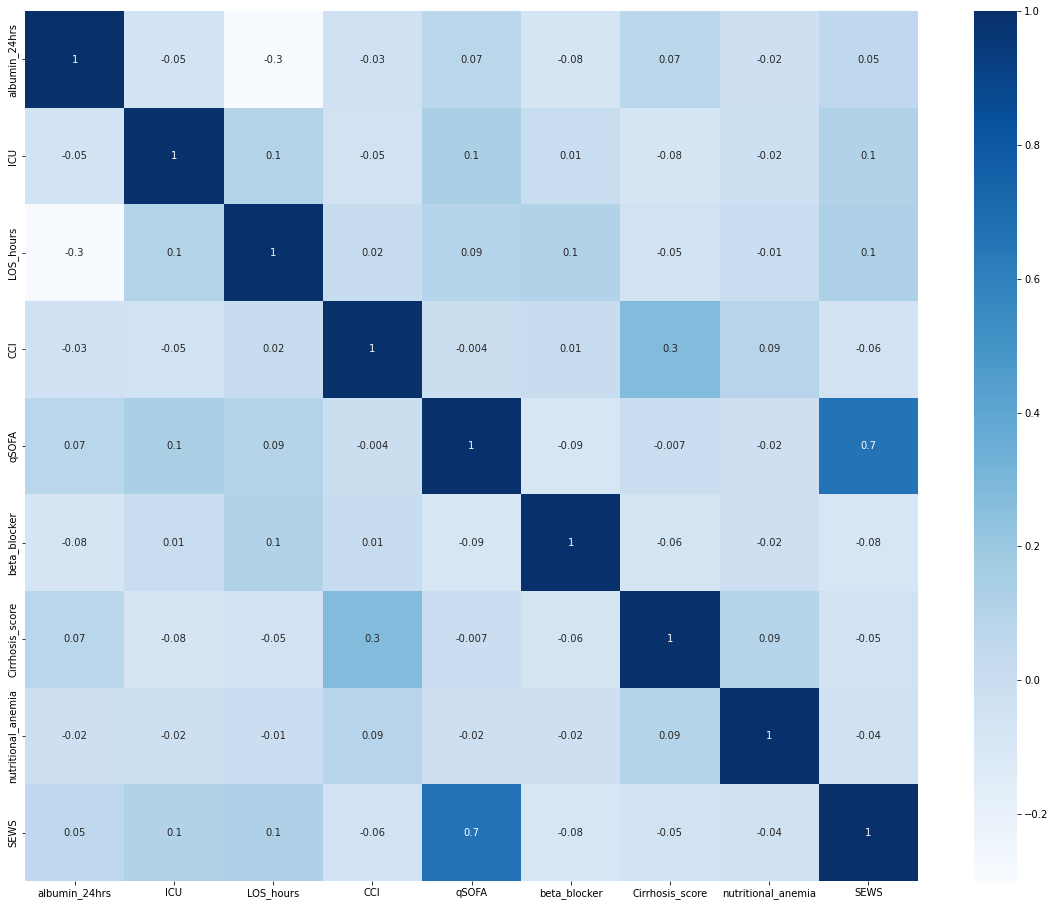

In [67]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [68]:
df.head()

condition  albumin_24hrs  ICU    LOS_hours  CCI  qSOFA  beta_blocker  \
0       D62              1    0    52.366667    4      0             1   
1       D64              0    0    76.400000    0      2             0   
2       D62              1    1   184.466667    2      1             0   
3       D64              0    0   307.633333    6      0             1   
4       D64              1    0  1630.083333    8      0             1   

   Cirrhosis_score  nutritional_anemia  SEWS  
0                0                   0     0  
1                0                   0     2  
2                0                   0     3  
3                0                   0     0  
4                0                   0     1

In [73]:
df = df.drop(columns=['condition'])

In [74]:
ivs = df.columns.tolist()
print(ivs)

['albumin_24hrs', 'ICU', 'LOS_hours', 'CCI', 'qSOFA', 'beta_blocker', 'Cirrhosis_score', 'nutritional_anemia', 'SEWS']


In [75]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['LOS_hours'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [76]:
sig_df

Var      Corr        p-value
0       albumin_24hrs -0.300167   0.000000e+00
1                 ICU  0.105758   0.000000e+00
2           LOS_hours  1.000000   0.000000e+00
3                 CCI  0.016718   5.549321e-25
4               qSOFA  0.094067   0.000000e+00
5        beta_blocker  0.107025   0.000000e+00
6     Cirrhosis_score -0.050087  3.078528e-210
7  nutritional_anemia -0.010476   9.896056e-11
8                SEWS  0.119922   0.000000e+00

In [77]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr        p-value
0       albumin_24hrs -0.300167   0.000000e+00
1                 ICU  0.105758   0.000000e+00
2           LOS_hours  1.000000   0.000000e+00
3                 CCI  0.016718   5.549321e-25
4               qSOFA  0.094067   0.000000e+00
5        beta_blocker  0.107025   0.000000e+00
6     Cirrhosis_score -0.050087  3.078528e-210
7  nutritional_anemia -0.010476   9.896056e-11
8                SEWS  0.119922   0.000000e+00

In [78]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Empty DataFrame
Columns: [Var, Corr, p-value]
Index: []

## Check Intercorrelations between indep. vars

## Remove Variables with High Intercorellation

In [79]:
df_iv = f_df.drop(columns= ['LOS_hours'])

In [82]:
df_iv.drop(columns=['condition'], inplace=True)

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

              feature       VIF
0       albumin_24hrs  1.568245
1                 ICU  1.291729
2                 CCI  2.181992
3               qSOFA  3.049596
4        beta_blocker  1.447036
5     Cirrhosis_score  1.483052
6  nutritional_anemia  1.093528
7                SEWS  2.798136


## Convert Numeric Outcome Variables to Categorical

## Convert LOS_Hours and ICU_LOS_hours Vars to Days Vars

In [84]:
f_df.head()

condition  albumin_24hrs  ICU    LOS_hours  CCI  qSOFA  beta_blocker  \
0       D62              1    0    52.366667    4      0             1   
1       D64              0    0    76.400000    0      2             0   
2       D62              1    1   184.466667    2      1             0   
3       D64              0    0   307.633333    6      0             1   
4       D64              1    0  1630.083333    8      0             1   

   Cirrhosis_score  nutritional_anemia  SEWS  
0                0                   0     0  
1                0                   0     2  
2                0                   0     3  
3                0                   0     0  
4                0                   0     1

In [85]:
f_df['LOS_days'] = f_df['LOS_hours']/24
f_df.drop(columns=['LOS_hours'], inplace=True)

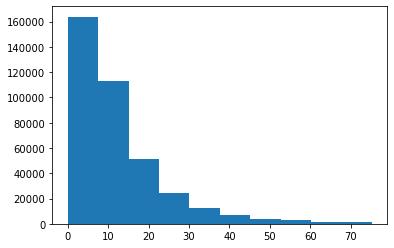

In [86]:
plt.hist(f_df['LOS_days']);

In [87]:
f_df['LOS_days'].describe()

count    381209.000000
mean         12.366741
std          11.312094
min           0.000000
25%           4.909028
50%           8.856250
75%          15.964884
max          75.239583
Name: LOS_days, dtype: float64

## Convert LOS_days to Categorical

In [88]:
# Calculate Tertiles

q1 = f_df['LOS_days'].quantile(q=(1/3))
q2 = f_df['LOS_days'].quantile(q=(2/3))
print(q1)
print(q2)

6.092361111111111
12.99219907407404


In [89]:
# bin the LOS_days var

LOS = f_df['LOS_days']
m = max(LOS)

bins = [0, 5, 10, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

f_df['LOS_days'] = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [90]:
f_df['LOS_days'].value_counts()

2    169605
1    113625
0     97979
Name: LOS_days, dtype: int64

In [93]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381209 entries, 0 to 386134
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   condition           381209 non-null  object  
 1   albumin_24hrs       381209 non-null  int64   
 2   ICU                 381209 non-null  int64   
 3   CCI                 381209 non-null  int64   
 4   qSOFA               381209 non-null  int64   
 5   beta_blocker        381209 non-null  int64   
 6   Cirrhosis_score     381209 non-null  int64   
 7   nutritional_anemia  381209 non-null  int64   
 8   SEWS                381209 non-null  int64   
 9   LOS_days            381209 non-null  category
dtypes: category(1), int64(8), object(1)
memory usage: 29.4+ MB


## Export as csv for other analysis

In [92]:
f_df.to_csv('/Users/ianweimer/Desktop/JupyterNotebooks/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/Albumin_Cleaned.csv', index=False)